# Convolutional Neural Network

### Importing the libraries

In [ ]:
# Set a seed value
seed_value= 123
# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)
# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)
# 4. Set `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(123) 

# # 5. For layers that introduce randomness like dropout, make sure to set seed values 
# #6 Configure a new global `tensorflow` session


AttributeError: module 'tensorflow' has no attribute 'ConfigProto'

In [ ]:

from __future__ import print_function
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
#simplified interface for building models 
import keras
#our handwritten character labeled dataset
#because our models are simple
from keras.models import Sequential
#dense means fully connected layers, dropout is a technique to improve convergence, flatten to reshape our matrices for feeding
#into respective layers
# from keras.layers import Dense, Dropout, Flatten
#for convolution (images) and pooling is a technique to help choose the most relevant features in an image
# from keras.layers import Conv2D, MaxPooling2
# from keras import layers
# from keras.models import Model

Using TensorFlow backend.


In [ ]:
#14 difference characters
num_classes = 14



## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/floyd/input/cnndata/Train',
                                                 target_size = (280, 280),
                                                 batch_size = 32,
                                                 class_mode='categorical')

Found 7560 images belonging to 14 classes.


### Preprocessing the Test set

In [5]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/floyd/input/cnndata/Test',
                                            target_size = (280, 280),
                                            batch_size = 32,
                                            class_mode='categorical')

Found 2548 images belonging to 14 classes.


## Part 2 - Building the CNN

In [6]:
cnn = Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(280,280,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5,seed=seed_value),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5,seed=seed_value),
    keras.layers.Dense(14, activation='softmax')
])

### Building the CNN

In [7]:
# cnn = Sequential()
# cnn.add(Conv2D(32, kernel_size=3,
#                  activation='relu',
#                  input_shape=[280,280,3]))
# cnn.add(MaxPooling2D(pool_size= 2, strides=2))
# cnn.add(Conv2D(filters= 280, kernel_size = 3,activation= 'relu'))
# cnn.add(MaxPooling2D(pool_size= 2, strides=2))
# cnn.add(Conv2D(filters= 280, kernel_size = 3,activation= 'relu'))
# cnn.add(MaxPooling2D(pool_size= 2, strides=2))
# cnn.add(Dropout(0.5))
# cnn.add(Conv2D(filters= 280, kernel_size = 3,activation= 'relu'))
# cnn.add(MaxPooling2D(pool_size= 2, strides=2))
# cnn.add(Conv2D(filters= 280, kernel_size = 3,activation= 'relu'))
# cnn.add(MaxPooling2D(pool_size= 2, strides=2))
# cnn.add(Dropout(0.5))
# cnn.add(Flatten())
# cnn.add(Dense(units=64, activation= 'relu'))
# #output a softmax to squash the matrix into output probabilities
# cnn.add(Dense(num_classes, activation='softmax'))


## Part 3 - Training the CNN

### Compiling the CNN

In [8]:
# cnn.compile(loss='kullback_leibler_divergence',
#               optimizer = 'nadam',
#               metrics=['accuracy'])
cnn.compile(loss='kullback_leibler_divergence', optimizer=tf.optimizers.SGD(lr=0.001), metrics=['accuracy'])

In [9]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 138, 138, 96)      34944     
_________________________________________________________________
batch_normalization_1 (Batch (None, 138, 138, 96)      384       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 68, 68, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 68, 68, 256)       614656    
_________________________________________________________________
batch_normalization_2 (Batch (None, 68, 68, 256)       1024      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 33, 33, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 384)      

In [12]:
h = cnn.fit(x = training_set, validation_data = test_set, epochs = 100)

Epoch 1/75
237/237 [==============================] - 831s 4s/step - loss: 2.1672 - accuracy: 0.4089 - val_loss: 2.4537 - val_accuracy: 0.0954
Epoch 2/75
237/237 [==============================] - 777s 3s/step - loss: 0.9163 - accuracy: 0.6930 - val_loss: 1.4973 - val_accuracy: 0.3285
Epoch 3/75
237/237 [==============================] - 781s 3s/step - loss: 0.5764 - accuracy: 0.8116 - val_loss: 1.3488 - val_accuracy: 0.5620
Epoch 4/75
237/237 [==============================] - 778s 3s/step - loss: 0.3870 - accuracy: 0.8690 - val_loss: 1.5046 - val_accuracy: 0.5549
Epoch 5/75
237/237 [==============================] - 783s 3s/step - loss: 0.3120 - accuracy: 0.8968 - val_loss: 2.3334 - val_accuracy: 0.5962
Epoch 6/75
237/237 [==============================] - 776s 3s/step - loss: 0.2664 - accuracy: 0.9151 - val_loss: 1.1892 - val_accuracy: 0.6264
Epoch 7/75
237/237 [==============================] - 773s 3s/step - loss: 0.2147 - accuracy: 0.9307 - val_loss: 3.5073 - val_accuracy: 0.6181

### Training the CNN on the Training set and evaluating it on the Test set

In [13]:
h.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [14]:
accuracy = h.history['accuracy']
loss = h.history['loss']
val_accuracy = h.history['val_accuracy']
val_loss = h.history['val_loss']

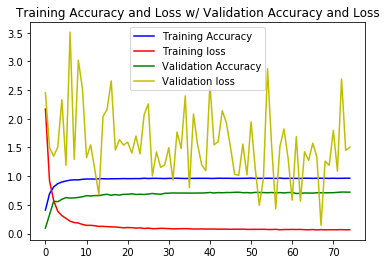

In [15]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_accuracy, 'g', label='Validation Accuracy')
plt.plot(epochs, val_loss, 'y', label='Validation loss')
plt.title('Training Accuracy and Loss w/ Validation Accuracy and Loss')
plt.legend()
# second run with 540/182 dataset split 237 steps 25 epochs loss: kullback_leibler_divergence optimizer: nadam

### Part 4 - Making a single prediction

In [16]:
model_json = cnn.to_json()
with open("cnnfinal.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
cnn.save_weights("cnnfinal.h5")
print("Saved model to disk")


Saved model to disk


In [17]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/floyd/input/cnndata/Musca.png', target_size = (280, 280))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
thing = ['Apus','Auriga','Camelopardalis','Cassiopeia','Chamaeleon','Circinus','Crux','Dorado','Indus','Musca','Reticulum','Triangulum Australe','Tucana','Ursa MinorUrsa Major']
print(result)
e = np.argmax(result,axis=1)
e=int(e)
# print(cnn.predict_generator(test_image))
print(thing[e])
#Circinus, Apus

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
Reticulum


In [18]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/floyd/input/cnndata/Apus  (2).png', target_size = (280, 280))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
thing = ['Apus','Auriga','Camelopardalis','Cassiopeia','Chamaeleon','Circinus','Crux','Dorado','Indus','Musca','Reticulum','Triangulum Australe','Tucana','Ursa MinorUrsa Major']
print(result)
e = np.argmax(result,axis=1)
e=int(e)
# print(cnn.predict_generator(test_image))
print(thing[e])
#Circinus, Apus

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
Dorado


In [19]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/floyd/input/cnndata/Apus .png', target_size = (280, 280))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
thing = ['Apus','Auriga','Camelopardalis','Cassiopeia','Chamaeleon','Circinus','Crux','Dorado','Indus','Musca','Reticulum','Triangulum Australe','Tucana','Ursa MinorUrsa Major']
print(result)
e = np.argmax(result,axis=1)
e=int(e)
# print(cnn.predict_generator(test_image))
print(thing[e])
#Circinus, Apus

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
Reticulum


In [20]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/floyd/input/cnndata/Auriga  .png', target_size = (280, 280))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
thing = ['Apus','Auriga','Camelopardalis','Cassiopeia','Chamaeleon','Circinus','Crux','Dorado','Indus','Musca','Reticulum','Triangulum Australe','Tucana','Ursa MinorUrsa Major']
print(result)
e = np.argmax(result,axis=1)
e=int(e)
# print(cnn.predict_generator(test_image))
print(thing[e])
#Circinus, Apus

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Camelopardalis


In [21]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/floyd/input/cnndata/Auriga 2 .png', target_size = (280, 280))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
thing = ['Apus','Auriga','Camelopardalis','Cassiopeia','Chamaeleon','Circinus','Crux','Dorado','Indus','Musca','Reticulum','Triangulum Australe','Tucana','Ursa MinorUrsa Major']
print(result)
e = np.argmax(result,axis=1)
e=int(e)
# print(cnn.predict_generator(test_image))
print(thing[e])
#Circinus, Apus

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
Tucana


In [22]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/floyd/input/cnndata/Camelopardalis1.png', target_size = (280, 280))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
thing = ['Apus','Auriga','Camelopardalis','Cassiopeia','Chamaeleon','Circinus','Crux','Dorado','Indus','Musca','Reticulum','Triangulum Australe','Tucana','Ursa MinorUrsa Major']
print(result)
e = np.argmax(result,axis=1)
e=int(e)
# print(cnn.predict_generator(test_image))
print(thing[e])
#Circinus, Apus

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Camelopardalis


In [23]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/floyd/input/cnndata/Camelopardalis2.png', target_size = (280, 280))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
thing = ['Apus','Auriga','Camelopardalis','Cassiopeia','Chamaeleon','Circinus','Crux','Dorado','Indus','Musca','Reticulum','Triangulum Australe','Tucana','Ursa MinorUrsa Major']
print(result)
e = np.argmax(result,axis=1)
e=int(e)
# print(cnn.predict_generator(test_image))
print(thing[e])
#Circinus, Apus

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Camelopardalis


In [24]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/floyd/input/cnndata/Cassiopeia1.png', target_size = (280, 280))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
thing = ['Apus','Auriga','Camelopardalis','Cassiopeia','Chamaeleon','Circinus','Crux','Dorado','Indus','Musca','Reticulum','Triangulum Australe','Tucana','Ursa MinorUrsa Major']
print(result)
e = np.argmax(result,axis=1)
e=int(e)
# print(cnn.predict_generator(test_image))
print(thing[e])
#Circinus, Apus

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Camelopardalis


In [25]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/floyd/input/cnndata/Cassiopeia2.png', target_size = (280, 280))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
thing = ['Apus','Auriga','Camelopardalis','Cassiopeia','Chamaeleon','Circinus','Crux','Dorado','Indus','Musca','Reticulum','Triangulum Australe','Tucana','Ursa MinorUrsa Major']
print(result)
e = np.argmax(result,axis=1)
e=int(e)
# print(cnn.predict_generator(test_image))
print(thing[e])
#Circinus, Apus

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Camelopardalis


In [26]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/floyd/input/cnndata/Chamaeleon (2).png', target_size = (280, 280))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
thing = ['Apus','Auriga','Camelopardalis','Cassiopeia','Chamaeleon','Circinus','Crux','Dorado','Indus','Musca','Reticulum','Triangulum Australe','Tucana','Ursa MinorUrsa Major']
print(result)
e = np.argmax(result,axis=1)
e=int(e)
# print(cnn.predict_generator(test_image))
print(thing[e])
#Circinus, Apus

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Auriga


In [27]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/floyd/input/cnndata/Chamaeleon.png', target_size = (280, 280))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
thing = ['Apus','Auriga','Camelopardalis','Cassiopeia','Chamaeleon','Circinus','Crux','Dorado','Indus','Musca','Reticulum','Triangulum Australe','Tucana','Ursa MinorUrsa Major']
print(result)
e = np.argmax(result,axis=1)
e=int(e)
# print(cnn.predict_generator(test_image))
print(thing[e])
#Circinus, Apus

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Indus


In [28]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/floyd/input/cnndata/Circinus (2).png', target_size = (280, 280))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
thing = ['Apus','Auriga','Camelopardalis','Cassiopeia','Chamaeleon','Circinus','Crux','Dorado','Indus','Musca','Reticulum','Triangulum Australe','Tucana','Ursa MinorUrsa Major']
print(result)
e = np.argmax(result,axis=1)
e=int(e)
# print(cnn.predict_generator(test_image))
print(thing[e])
#Circinus, Apus

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
Reticulum


In [29]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/floyd/input/cnndata/Circinus.png', target_size = (280, 280))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
thing = ['Apus','Auriga','Camelopardalis','Cassiopeia','Chamaeleon','Circinus','Crux','Dorado','Indus','Musca','Reticulum','Triangulum Australe','Tucana','Ursa MinorUrsa Major']
print(result)
e = np.argmax(result,axis=1)
e=int(e)
# print(cnn.predict_generator(test_image))
print(thing[e])
#Circinus, Apus

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
Dorado


In [30]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/floyd/input/cnndata/Crux  (2).png', target_size = (280, 280))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
thing = ['Apus','Auriga','Camelopardalis','Cassiopeia','Chamaeleon','Circinus','Crux','Dorado','Indus','Musca','Reticulum','Triangulum Australe','Tucana','Ursa MinorUrsa Major']
print(result)
e = np.argmax(result,axis=1)
e=int(e)
# print(cnn.predict_generator(test_image))
print(thing[e])
#Circinus, Apus

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Camelopardalis


In [31]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/floyd/input/cnndata/Crux .png', target_size = (280, 280))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
thing = ['Apus','Auriga','Camelopardalis','Cassiopeia','Chamaeleon','Circinus','Crux','Dorado','Indus','Musca','Reticulum','Triangulum Australe','Tucana','Ursa MinorUrsa Major']
print(result)
e = np.argmax(result,axis=1)
e=int(e)
# print(cnn.predict_generator(test_image))
print(thing[e])
#Circinus, Apus

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
Dorado


In [32]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/floyd/input/cnndata/Dorado (2).png', target_size = (280, 280))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
thing = ['Apus','Auriga','Camelopardalis','Cassiopeia','Chamaeleon','Circinus','Crux','Dorado','Indus','Musca','Reticulum','Triangulum Australe','Tucana','Ursa MinorUrsa Major']
print(result)
e = np.argmax(result,axis=1)
e=int(e)
# print(cnn.predict_generator(test_image))
print(thing[e])
#Circinus, Apus

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
Dorado


In [33]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/floyd/input/cnndata/Dorado.png', target_size = (280, 280))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
thing = ['Apus','Auriga','Camelopardalis','Cassiopeia','Chamaeleon','Circinus','Crux','Dorado','Indus','Musca','Reticulum','Triangulum Australe','Tucana','Ursa MinorUrsa Major']
print(result)
e = np.argmax(result,axis=1)
e=int(e)
# print(cnn.predict_generator(test_image))
print(thing[e])
#Circinus, Apus

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
Dorado


In [34]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/floyd/input/cnndata/Indus.png', target_size = (280, 280))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
thing = ['Apus','Auriga','Camelopardalis','Cassiopeia','Chamaeleon','Circinus','Crux','Dorado','Indus','Musca','Reticulum','Triangulum Australe','Tucana','Ursa MinorUrsa Major']
print(result)
e = np.argmax(result,axis=1)
e=int(e)
# print(cnn.predict_generator(test_image))
print(thing[e])
#Circinus, Apus

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
Circinus


In [35]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/floyd/input/cnndata/Indus2.png', target_size = (280, 280))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
thing = ['Apus','Auriga','Camelopardalis','Cassiopeia','Chamaeleon','Circinus','Crux','Dorado','Indus','Musca','Reticulum','Triangulum Australe','Tucana','Ursa MinorUrsa Major']
print(result)
e = np.argmax(result,axis=1)
e=int(e)
# print(cnn.predict_generator(test_image))
print(thing[e])
#Circinus, Apus

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Indus


In [36]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/floyd/input/cnndata/Musca (2).png', target_size = (280, 280))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
thing = ['Apus','Auriga','Camelopardalis','Cassiopeia','Chamaeleon','Circinus','Crux','Dorado','Indus','Musca','Reticulum','Triangulum Australe','Tucana','Ursa MinorUrsa Major']
print(result)
e = np.argmax(result,axis=1)
e=int(e)
# print(cnn.predict_generator(test_image))
print(thing[e])
#Circinus, Apus

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Camelopardalis


In [37]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/floyd/input/cnndata/Musca.png', target_size = (280, 280))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
thing = ['Apus','Auriga','Camelopardalis','Cassiopeia','Chamaeleon','Circinus','Crux','Dorado','Indus','Musca','Reticulum','Triangulum Australe','Tucana','Ursa MinorUrsa Major']
print(result)
e = np.argmax(result,axis=1)
e=int(e)
# print(cnn.predict_generator(test_image))
print(thing[e])
#Circinus, Apus

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
Reticulum


In [38]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/floyd/input/cnndata/Reticulum  (2).png', target_size = (280, 280))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
thing = ['Apus','Auriga','Camelopardalis','Cassiopeia','Chamaeleon','Circinus','Crux','Dorado','Indus','Musca','Reticulum','Triangulum Australe','Tucana','Ursa MinorUrsa Major']
print(result)
e = np.argmax(result,axis=1)
e=int(e)
# print(cnn.predict_generator(test_image))
print(thing[e])
#Circinus, Apus

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Camelopardalis


In [39]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/floyd/input/cnndata/Reticulum .png', target_size = (280, 280))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
thing = ['Apus','Auriga','Camelopardalis','Cassiopeia','Chamaeleon','Circinus','Crux','Dorado','Indus','Musca','Reticulum','Triangulum Australe','Tucana','Ursa MinorUrsa Major']
print(result)
e = np.argmax(result,axis=1)
e=int(e)
# print(cnn.predict_generator(test_image))
print(thing[e])
#Circinus, Apus

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
Tucana


In [40]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/floyd/input/cnndata/Triangulum Australe (2).png', target_size = (280, 280))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
thing = ['Apus','Auriga','Camelopardalis','Cassiopeia','Chamaeleon','Circinus','Crux','Dorado','Indus','Musca','Reticulum','Triangulum Australe','Tucana','Ursa MinorUrsa Major']
print(result)
e = np.argmax(result,axis=1)
e=int(e)
# print(cnn.predict_generator(test_image))
print(thing[e])
#Circinus, Apus

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
Crux


In [41]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/floyd/input/cnndata/Triangulum Australe.png', target_size = (280, 280))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
thing = ['Apus','Auriga','Camelopardalis','Cassiopeia','Chamaeleon','Circinus','Crux','Dorado','Indus','Musca','Reticulum','Triangulum Australe','Tucana','Ursa MinorUrsa Major']
print(result)
e = np.argmax(result,axis=1)
e=int(e)
# print(cnn.predict_generator(test_image))
print(thing[e])
#Circinus, Apus

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Indus


In [42]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/floyd/input/cnndata/Tucana (2).png', target_size = (280, 280))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
thing = ['Apus','Auriga','Camelopardalis','Cassiopeia','Chamaeleon','Circinus','Crux','Dorado','Indus','Musca','Reticulum','Triangulum Australe','Tucana','Ursa MinorUrsa Major']
print(result)
e = np.argmax(result,axis=1)
e=int(e)
# print(cnn.predict_generator(test_image))
print(thing[e])
#Circinus, Apus

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
Tucana


In [43]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/floyd/input/cnndata/Tucana.png', target_size = (280, 280))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
thing = ['Apus','Auriga','Camelopardalis','Cassiopeia','Chamaeleon','Circinus','Crux','Dorado','Indus','Musca','Reticulum','Triangulum Australe','Tucana','Ursa MinorUrsa Major']
print(result)
e = np.argmax(result,axis=1)
e=int(e)
# print(cnn.predict_generator(test_image))
print(thing[e])
#Circinus, Apus

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
Tucana


In [44]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/floyd/input/cnndata/Ursa MinorUrsa Major.png', target_size = (280, 280))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
thing = ['Apus','Auriga','Camelopardalis','Cassiopeia','Chamaeleon','Circinus','Crux','Dorado','Indus','Musca','Reticulum','Triangulum Australe','Tucana','Ursa MinorUrsa Major']
print(result)
e = np.argmax(result,axis=1)
e=int(e)
# print(cnn.predict_generator(test_image))
print(thing[e])
#Circinus, Apus

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Ursa MinorUrsa Major


In [45]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/floyd/input/cnndata/Ursa MinorUrsa Major2.png', target_size = (280, 280))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
thing = ['Apus','Auriga','Camelopardalis','Cassiopeia','Chamaeleon','Circinus','Crux','Dorado','Indus','Musca','Reticulum','Triangulum Australe','Tucana','Ursa MinorUrsa Major']
print(result)
e = np.argmax(result,axis=1)
e=int(e)
# print(cnn.predict_generator(test_image))
print(thing[e])
#Circinus, Apus

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Camelopardalis


In [9]:
import numpy as np
import keras.models
from keras.models import model_from_json
from keras.preprocessing import image

json_file = open('cnnfinal.json','r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
#load woeights into new model
loaded_model.load_weights("cnnfinal.h5")
print("Loaded Model from disk")

test_image = image.load_img('Apus .png', target_size = (280, 280))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
out = loaded_model.predict(test_image)
print(out)
e = np.argmax(out,axis=1)
e=int(e)
print(thing[e])
thing = ['Apus','Auriga','Camelopardalis','Cassiopeia','Chamaeleon','Circinus','Crux','Dorado','Indus','Musca','Reticulum','Triangulum Australe','Tucana','Ursa MinorUrsa Major']


Loaded Model from disk
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
Reticulum
